# NICO2AI  第3回 線形回帰 (7/1) 基礎演習
## 今日の目標
* Pythonの利便性を上げるクラスなどの構文が書けるようになる
* 二乗誤差最小化に基づく線形回帰アルゴリズムを数式で記述し、その実装ができる
* 実データを用いて線形回帰を行い、その結果をMatplotlibを用いて可視化できる

## キーワード
* 最小二乗回帰
* map, reduce, filter
* Advanced indexing
* Matplotlib

## 基礎演習の進め方
1. 講師がコードの説明をします
2. 講師の指示にしたがって、各セルのコードを実行してください
3. 一部のコードは、「エラー例」「参考」用としてコメントアウトされています。必要に応じてコメントアウトを解除して挙動を確かめよう
4. "WRITE ME!"と書かれている部分は講師の指示とヒントに従いながら自分の手で書いてみましょう

In [1]:
# 今日使うパッケージのインポート
%matplotlib inline

import os
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn import datasets

# デフォルトのスタイルシートの変更
plt.style.use('ggplot')
plt.rcParams['ytick.color'] = '111111'
plt.rcParams['xtick.color'] = '111111'
plt.rcParams['axes.labelcolor'] = '111111'
plt.rcParams['font.size'] = 15

# 日本語文字化け対策
fontnames = [os.path.basename(fm.FontProperties(fname=f).get_name()) for f in fm.findSystemFonts()]
selected = list(filter(lambda x: 'IPAGothic' in x or 'TakaoGothic' in x or 'Osaka' in x, fontnames))

if len(selected) == 0:
    print('ERROR! Install Japanese font beforehand')
else:
    plt.rcParams['font.family'] = selected[0]

# 1. Python・numpyのさらなる活用
前2回より発展的なPython・numpyの使い方を学びましょう。

## map, reduce, filterとラムダ式
たくさんのファイルやデータを処理する時、しばしばリストの各要素に対して同じ処理をしたい場合があります。  
その際、Pythonではmap, reduce, filterと呼ばれる便利な関数群を使うことができます。
これらの基本的な使い方は3関数共通で、
```
結果 = 関数名(関数またはラムダ式、リスト)
```
という呼び出し方をします。実際に場面と用法を見ていきましょう。

### ラムダ式 (lambda)
本題に移る前に、ラムダ式について簡単に説明します。
ラムダ式はlambdaキーワードを使って、**無名 (名無し) 関数**を書くことができる仕組みです。

map/reduce/filterはいずれも同じ処理を繰り返しおこないますが、簡単な処理 (足し算など) のためにいちいち関数を定義してやるのは面倒な上、わざわざ名前をつけなくとも良い場合が多々あります。  
例えば、変数xのy乗を計算する場合、通常の関数では

In [2]:
def power(x, y):
    return x ** y

print(power(3, 2))  # -> 9

9


とかいてやる必要がありますが、ラムダ式では
```
lambda 引数: 返り値
```
と書くことで、1行に収めることができます。これから紹介する関数ではラムダ式が非常に便利な役割を果たします。

In [3]:
f = lambda x, y: x ** y

print(f(3, 2))

9


### map: 同じ処理を繰り返す
mapキーワードは、**リスト中の全ての要素に対して同じ計算を行い**、イテレータを返します。  
range文と同様、帰ってきたイテレータをlist()で囲ってやると、新しいリストを得ることができます。

#### 使用場面：
* ファイル名の一覧に対し、全て拡張子をつける
* 浮動小数点のリストをint関数を使って全て整数にする

**注意：数値を全て2倍するなどの操作なら、numpyの機能を使ったほうが良い**

In [4]:
# リストの全ての要素を2倍に
single = list(range(10))
print(single)

double = list(map(lambda x: x * 2, single))
print(double)

# ファイル名の末尾に.jpgを付け加える
filename_list = ["GOPR0088", "GOPR0089", "GOPR0090"]
filename_ext_list = list(map(lambda x: x+".jpg", filename_list))
print(filename_ext_list)

# range文と同じように使うこともできる
for filename in map(lambda x: x+".jpg", filename_list):
    print(filename)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
['GOPR0088.jpg', 'GOPR0089.jpg', 'GOPR0090.jpg']
GOPR0088.jpg
GOPR0089.jpg
GOPR0090.jpg


### reduce: 順番に束ねる
reduce関数は、map関数とは異なり、次のような操作を行います：
1. リストの先頭2つをとる
2. 2つの要素に対して処理を行い、処理結果を得る
3. 続いて、得られた処理結果と3番めをとり、処理する要素がなくなるまで繰り返す

#### 使用場面：
* たくさんのリストや文字列を1つに連結する

In [5]:
# Python2では組み込みだったが、Python3でfunctoolsというモジュール内の関数に格下げ
from functools import reduce

# 文字列の連結
splitted_strs = ["h", "e", "l", "l", "o"]
string = reduce(lambda a, b: a + b, splitted_strs)
print(string)

# リストの連結
many_lists = [list(range(10)) for _ in range(10)]
large_list = reduce(lambda a, b: a + b, many_lists)
print(large_list)

hello
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


### filter: 値を選び出す
filter関数は、**ある条件にしたがってリスト中の値を選び出す**操作を行います。
map関数と同じように、各要素を入力とする関数またはラムダ式を書きますが、そこでTrueを返したものを残し、Falseを返したものを排除します。
#### 使用場面：
* たくさんのリストのうち、長さが0 (空) のものを排除する
* 辞書 (dict) のあるキーについて、ある値を持つ要素を選び出す

**注意：多くの場合、numpyのadvanced indexingを使った方が良い**

In [6]:
# 空リストの削除
data = [[1, 2, 3], [1, 2], [], [3, 4], []]
filtered_data = list(filter(lambda x: len(x) > 0, data))
print(filtered_data)

# 名前によるフィルタ
dicts = [{"hoge": "fuga", "foo": "bar"}, {"hoge": "fuga", "foo": "bar"}, {"hoge": "huga", "foo": "var"}]
filtered_dicts = list(filter(lambda x: x["hoge"] == "fuga", dicts))
print(filtered_dicts)

[[1, 2, 3], [1, 2], [3, 4]]
[{'foo': 'bar', 'hoge': 'fuga'}, {'foo': 'bar', 'hoge': 'fuga'}]


## クラス (class)
Pythonは、オブジェクト指向プログラミング (Object Oriented Programming) を意識した言語の1つです。そのため、Pythonにおいてもクラスの機能が定義されています。関数はその機能のみをひとくくりにしていたのを、クラスでは関数 (メソッド) と使用するデータを纏めて、**必ずしもクラス内部の詳細を意識せずに機能を利用することができるようになります (カプセル化)**。

### クラスの定義
クラスの定義には、classキーワードを使います。何もしないクラスはたった2行でかけます：

In [7]:
class Sample_class:
    pass  # pass文： if 文、for文、関数などで「何もしない」を書きたい時に使用

今まで通り、クラスの中身はクラス定義から1段インデントしたところに書きます。

### メソッド・インスタンス変数・\_\_init\_\_
クラスは、例えていえば「設計図」のようなものです。実際にその機能を使うためには、クラスを「インスタンス」と呼ばれる実体として作成する必要があります。

クラスの中身には**メソッド (関数のようなもの)** と**インスタンス変数 (クラス内の変数)**があり、インスタンス変数の値はインスタンスごとに独立に保持されます。

#### \_\_init\_\_関数
クラスをインスタンス化する際、中身を初期化するために\_\_init\_\_関数が必ず呼びだされます。ここに、クラス内の値の初期化を記述します。

#### 例：カウンタ

In [8]:
# カウンタの定義
class Counter:
    def __init__(self):
        self.count = 0
        
    def push_count(self):
        self.count += 1
    
    def get_count(self):
        return self.count

In [9]:
# 使ってみる
counter_1 = Counter()  # インスタンス化
print(counter_1.get_count())  # 初期値は0
counter_1.push_count()
counter_1.push_count()
print(counter_1.get_count())  # 2回呼び出したので2

0
2


In [10]:
counter_2 = Counter()  # インスタンス化
print(counter_2.get_count())  # 別のインスタンスは元のインスタンスとは別物

0


## selfキーワード
すでにお気づきの方もいる通り、
* メソッド
* インスタンス変数

の両方に"self"というキーワードが使われています。

これは、Pythonがこの関数・変数があるクラスに属するものを見分けるためのもので、
* メソッドの最初の引数には必ずselfをつける
* インスタンス変数は常にself.と続ける

しないとメソッド・インスタンス変数として認識されません。

一方、これらの関数を呼び出すときに"self"をつける必要はありません。  
一見面倒 (そして実際面倒) な仕組みではありますが、**selfがついていればそれがメソッドまたはクラス変数であることがひと目でわかる**ことをPythonが重視した結果、このような仕組みになっています。

### クラスの例：ガウス分布を用いた確率的分類
第4回で扱うscikit-learnは、多数の機能を提供していますが、各クラスは必ず次のような**統一的なインターフェース**を用意しています。
* Estimator: データから学習するときには、**fit**関数を呼び出す
* Predictor: 学習済みのモデルを使って何らかの予測するときには、**predict**関数を呼び出す
* Transformer: 入力データを学習済みモデルを用いて変換するときには、**transform**関数を呼び出す
* Model: 学習したモデルの良さ (Goodness of fit, 適合度)を計算するときには、**score**関数を呼び出す

参考：http://scikit-learn.org/stable/developers/contributing.html#apis-of-scikit-learn-objects

講義で紹介したガウス分布のフィッティングを、scikit-learn風に書いてみます：

In [1]:
class GaussianClassifier:
    def __init__(self, n_classes):
        # インスタンス変数の初期化
        self.n_classes = n_classes
        self.mus = [0.0 for _ in range(n_classes)]  # クラスごとのガウス分布の平均
        self.sigmas = [1.0 for _ in range(n_classes)]  # クラスごとのガウス分布の分散
        self.priors = [1/n_classes for _ in range(n_classes)]  # クラスの事前確率
    
    def fit(self, X, Y):
        for cls in range(self.n_classes):
            X_c = X[Y == cls]  # ブーリアンマスクで品種 (クラス) ごとのデータを取り出す (後述)
            # ガウス分布の最尤推定 (標本平均、標本分散)
            self.mus[cls] = np.mean(X_c)
            self.sigmas[cls] = np.var(X_c)
        cnts = np.array([sum(Y == cls) for cls in range(self.n_classes)])  # クラスの事前分布p(y)の計算
        self.priors = cnts / np.sum(cnts)  # 正規化して確率分布とする
        
    def predict(self, x):
        probs = np.array([np.exp(-((x - mu) ** 2)/(2 * sigma)) / np.sqrt(2 * np.pi * sigma) * prior
                 for mu, sigma, prior in zip(self.mus, self.sigmas, self.priors)])
        return probs / np.sum(probs)  # 正規化して確率分布とする

上では、ガウス分布を用いた確率的生成モデルを定義していますが、私達はその中身を意識することなく、下のようにこのモデルを使うことができます：

In [12]:
# 使用例：がく片長からアヤメの品種を予測
iris = datasets.load_iris()
X = iris.data[:, 0]  #  今回は簡単のため1次元データを使用
Y = iris.target
labels = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
n_classes = 3

# モデルの学習
classifier = GaussianClassifier(n_classes)
classifier.fit(X, Y)  # 学習器の中身を意識することなく学習を実行できる

# 4cm〜8cmを1cm刻みで入力した場合の品種予測
for input_length in np.arange(4, 9, dtype=np.float):
    p = classifier.predict(input_length)
    print("{}cm - 予測された品種: {} (確率: {})".format(input_length, labels[np.argmax(p)], np.max(p)))

4.0cm - 予測された品種: setosa (確率: 0.9607760200892345)
5.0cm - 予測された品種: setosa (確率: 0.8691125452841645)
6.0cm - 予測された品種: versicolor (確率: 0.6433303906775817)
7.0cm - 予測された品種: virginica (確率: 0.8513394990157609)
8.0cm - 予測された品種: virginica (確率: 0.9956514498995187)


### 補足：確率分布の可視化
上の分類器の挙動は、可視化するとひと目でわかります。  
各入力点において、そのクラス確率が最も大きなものを予測とします。

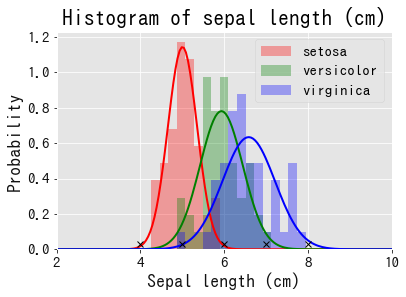

In [13]:
plt.figure()
plt.title("Histogram of sepal length (cm)")
bins = np.linspace(2, 10, 40)
for cls in range(n_classes):
    X_c = X[Y == cls]
    color = colors[cls]
    label = labels[cls]
    plt.hist(X_c, bins=bins, alpha=0.33, color=color, normed=True, label=label)
    mu = np.mean(X_c)
    sigma = np.var(X_c)
    x = np.linspace(-10, 10, 400)
    y = np.exp(-((x - mu) ** 2)/(2 * sigma)) / np.sqrt(2 * np.pi * sigma)
    plt.plot(x, y, linewidth=2, color=color)
plt.plot(np.arange(4, 9), np.ones(5)*0.03, linestyle='None', marker='x', color='k')
plt.xlim(2, 10)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Probability')
plt.legend()
plt.show()

## Advanced Indexing
すでに第1回で、次のような要素の切り出しができることを扱いました：
```
配列[start:end:step,...]
```
要素の切り出しはコピーを伴わないため**高速**である反面、次のような状況では使えませんでした：
* リストの1, 2, 4, 5番目を取り出す (非連続)
* 入力と出力のペアX, y (共にリスト) から、**y == 1**に対応するXを取り出す
* 行列Xの要素のうち、負のものをゼロにする

Numpyでは、自然に上記の操作を書くことができる**advanced indexing**と呼ばれる機能を備えています。  
実際に見てみましょう：

In [14]:
a = np.array([1, 2, 3, 4, 5])
print(a[[0, 1, 3, 4]])  # インデックスに非連続のリストを入れることができる

x = np.array([[1, 2], [3, 4], [5, 6]])
print(x[[0, 1, 2], [0, 1, 0]])  # 軸ごとにインデックスを指定

[1 2 4 5]
[1 4 5]


### Boolean array indexing
取り出したい要素のインデックスを数字で指定するだけでなく、ブーリアンマスク (TrueまたはFalseで構成された配列) を用いて、**Trueのインデックスの値**だけを取り出すことができます：

In [15]:
# 下の2つは等価
print(x[[0, 2]])
print(x[[True, False, True]])

[[1 2]
 [5 6]]
[[1 2]
 [5 6]]


### Advanced indexingの活用例

In [16]:
# 入力と出力のペア
X = np.array([[1, 3], [2, 5], [4, 1]])
y = np.array([0, 1, 0])
print(y == 0)  # ==との比較はブーリアンの行列を返す
print(X[y == 0])  # クラス0に対応するXのみを取り出す

# 一部の要素の書き換え
A = np.array([[3.1, -1.5], [-4.2, 6.7]])
print(A < 0)
A[A < 0] = 0.0
print(A)  # 負の値だけを0にできた！

[ True False  True]
[[1 3]
 [4 1]]
[[False  True]
 [ True False]]
[[ 3.1  0. ]
 [ 0.   6.7]]


### Advanced indexingの注意点
Advanced indexingは便利な反面、通常の切り出しよりかなり遅いため、濫用は避けましょう。

参考：https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html

In [17]:
# 切り出し
start = time.time()
x = np.arange(10000)
for _ in range(10000):
    y = x[2500:7500]
end = time.time()
print("{} (s)".format(end - start))

0.0043125152587890625 (s)


In [18]:
# ランダムなマスク
start = time.time()
x = np.arange(10000)
random_mask = np.round(np.random.random(10000)).astype(np.bool)
for _ in range(10000):
    y = x[random_mask]
end = time.time()
print("{} (s)".format(end - start))

0.8378379344940186 (s)


## 書いてみよう(2) ：Advanced indexingを用いた変数のマスク
irisデータセットには、Xに3品種のデータが含まれており、対応するYにはその品種のクラスが0〜2の3種類の値として格納されています。

**課題**：クラス1 (Verisicolor) のデータのみを
* 配列の切り出し
* ブーリアンマスク

の2種類の方法で取り出せ。

In [19]:
X = np.array(iris.data)
Y = np.array(iris.target)

print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [20]:
# WRITE ME!
basic = X[50:100]
advanced = X[Y == 1]

# エラーが出なければOK
assert (basic == advanced).all()

## Numpy配列の結合
第1・2回で行列の生成と操作について扱ってきましたが、実際には、それぞれ同じ長さを持つベクトルaとあるベクトルbを連結して新しい行列cがほしい、と言ったことが良くあります。Numpyにはそのためのメソッドとして複数の関数が用意されています。

配列を結合する場合、「どの次元方向に結合するか」が重要になります。**次元の数え方は0始まり**であることに注意しつつ見ていきましょう。

### np.stack: 指定の次元に新しい軸を作成

In [21]:
a = np.arange(3)
b = np.ones(3)
print(np.stack((a, b), axis=0))  # axis=0 (2, 3)：現在の軸の前に新しい軸を追加
print(np.stack((a, b), axis=1))  # axis=1 (3, 2): 現在の軸の後ろに新しい軸を追加

[[ 0.  1.  2.]
 [ 1.  1.  1.]]
[[ 0.  1.]
 [ 1.  1.]
 [ 2.  1.]]


### np.hstack：水平方向 (列方向、1軸目) に結合

In [22]:
c = np.array([[1],[2],[3]])
d = np.ones((3, 1))
print(np.hstack((c, d)))  # (3, 2)：1軸目 (列方向)に結合

a = np.arange(3)
b = np.ones(3)
print(np.hstack((a, b)))  # (6,)：列がない (1次元) の場合はそのまま結合

[[ 1.  1.]
 [ 2.  1.]
 [ 3.  1.]]
[ 0.  1.  2.  1.  1.  1.]


### np.vstack: 垂直方向 (行方向、0軸目) に結合

In [23]:
c = np.array([[1],[2],[3]])
d = np.ones((3, 1))
print(np.vstack((c, d)))  # (6, 1)：0軸目 (列方向)に結合

a = np.arange(3)
b = np.ones(3)
print(np.vstack((a, b)))  # (2, 3)：0軸目 (列方向)に結合

[[ 1.]
 [ 2.]
 [ 3.]
 [ 1.]
 [ 1.]
 [ 1.]]
[[ 0.  1.  2.]
 [ 1.  1.  1.]]


### np.dstack:  深さ方向 (2軸目) に結合

In [24]:
c = np.array([[1],[2],[3]])
d = np.ones((3, 1))
print(np.dstack((c, d)))  # (3, 1, 2)：2軸目 (列方向)にあたらしい軸を作り、結合

a = np.arange(3)
b = np.ones(3)
print(np.dstack((a, b)))  # (1, 3, 2)：2軸目 (列方向)にあたらしい軸を作り、結合

[[[ 1.  1.]]

 [[ 2.  1.]]

 [[ 3.  1.]]]
[[[ 0.  1.]
  [ 1.  1.]
  [ 2.  1.]]]


### np.concatenate: 指定した軸方向に結合

In [25]:
a = np.arange(3)
b = np.ones(3)
print(np.concatenate((a, b), axis=0))  # axis=0 (6,)：0軸目で連結
# print(np.concatenate((a, b), axis=1))  # 存在しない軸を指定した場合エラー

[ 0.  1.  2.  1.  1.  1.]


### 配列結合まとめ
|関数名|結合方向|新しい軸を作るか？|
|:--|--:|--:|
|np.stack|任意|作る(挿入する)|
|np.hstack|列方向 (1軸目)|軸が存在しない場合のみ|
|np.vstack|行方向 (0軸目)|軸が存在しない場合のみ|
|np.dstack|深さ方向 (2軸目)|軸が存在しない場合のみ|
|np.concatenate|任意|作らない|

## 単位行列の作成
単位行列は、np.zerosとnp.onesだけでは簡単に作れないため、専用の関数が用意されています。
$$
I = \left(
    \begin{array}{cccc}
      1 & 0 & \cdots & 0  \\
      0 & 1 & \cdots & 0 \\
      \vdots & \vdots & \ddots & \vdots \\
      0 & 0 & \cdots & 1 \\
    \end{array}
  \right)
$$

In [26]:
# 単位行列を作成
identity = np.eye(3)  # 単位行列の大きさを指定
print(identity)

print(identity*10)  # 定数倍

[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
[[ 10.   0.   0.]
 [  0.  10.   0.]
 [  0.   0.  10.]]


## 方程式を解く
科学技術演算の機能の多くはscipyに用意されていますが、numpyにもいくつかの数値計算を行ってくれる関数群が用意されています。
本節で紹介するnp.linalg.solveは、
$${\bf Ax} = {\bf b}$$
行列表記にすると、、
$$
  \left(
    \begin{array}{cccc}
      a_{11} & a_{12} & \cdots & a_{1m}  \\
      a_{21} & a_{22} & \cdots & a_{2m} \\
      \vdots & \vdots & \ddots & \vdots \\
      a_{m1} & a_{m2} & \cdots & a_{mm} \\
    \end{array}
  \right)
  \left(
    \begin{array}{c}
      x_{1} \\
      x_{2} \\
      \vdots \\
      x_{m} \\
    \end{array}
  \right)
  =
  \left(
    \begin{array}{c}
      b_{1} \\
      b_{2} \\
      \vdots \\
      b_{m} \\
    \end{array}
  \right)  
$$
連立方程式で書けば、
$$
\begin{eqnarray}
  \left\{
    \begin{array}{l}
      a_{11} x_1 + a_{12} x_2 + \cdots + a_{1m} x_m = y_1 \\
      a_{21} x_1 + a_{22} x_2 + \cdots + a_{2m} x_m = y_2 \\
      \vdots \\
      a_{m1} x_1 + a_{m2} x_2 + \cdots + a_{mm} x_m = y_m \\
    \end{array}
  \right.
\end{eqnarray}
$$
の形の方程式を説いて、解xを計算してくれます。このあとの線形回帰ではこの関数を利用して解析解を計算します。

### 例：

$$
  \left(
    \begin{array}{cc}
      3 & 1 \\
      1 & 2 \\
    \end{array}
  \right)
  \left(
    \begin{array}{c}
      x_1 \\
      x_2 \\
    \end{array}
  \right)
  =
  \left(
    \begin{array}{c}
      9 \\
      8 \\
    \end{array}
  \right)  
$$

In [27]:
a = np.array([[3,1], [1,2]])
b = np.array([9,8])

x = np.linalg.solve(a, b)
print(x)

[ 2.  3.]


### 補足：np.linalgモジュール
solve関数だけでなく、np.linalgモジュールでは次のような機能をサポートしています：
* cholesky: コレスキー分解
* svd: SVD (特異値分解)
* eig: 固有値及び固有ベクトルの計算
* det: 行列式の計算
* lstsq: 線形行列方程式 (linear matrix equation) を最小二乗法で解く (今日の内容！)

# 2. Matplotlib入門
本節では、データや学習結果を視覚的に見るための方法として、Matplotlibの基本的な使い方を扱います。  
Matplotlibは、主に2Dのグラフを表示するためのライブラリとして標準的に使われています。

高機能である一方、
* デザインを細かく調整しないと見た目が良くならない
* 仕組みが複雑で、学習曲線が急

という弱点があります。

本節はMatplotlibの基本概念とその最低限の使い方を素早く解説します。

**注意：本講義ではすでにグラフのデザインは見やすいようにやや調整しています。ファイル先頭に記述していますが、解説は行いません。**

In [28]:
# インポート
import matplotlib.pyplot as plt

### グラフの読み方
<img src="figures/anatomy1.png" width="50%">
(https://matplotlib.org/faq/usage_faq.html より)

Matplotlibのコマンドの意味を理解する最も簡単な方法は、対応する概念の名前を覚えることです。  
今回は以下の事項だけ覚えておきましょう：

* Figure：1枚の図全体 (**複数のプロットを持つことができる**)
* Axes: グリッドとデータ点を持つプロット (≠axis)
* Line: 直線プロット (曲がっているように見えますが、**細かく見ると直線プロットの集積です**)
* Scatter: 散布図プロット
* X/Y axis label: X軸/Y軸のラベル名
* Title: グラフタイトル
* Legend: 凡例 (各線・点の説明あるいは記述)

### Matplotlibの2つの使い方
Matplotlibで最初に戸惑うのは、**2種類の書き方が存在する**ということです。これは、Matplotlibがかっちりとしたシステムの上に、Matlabライクな構文をラッパーとして用意したためです。どちらも正しい書き方ですので、戸惑わないようにしてください。

#### 1. シンプルな書き方 (本講義で使用)
シンプルな方法では、基本的に全ての命令はplt.から呼び出します。  
簡単である一方、1枚のfigureが複数のaxesを持った場合、複数枚のfigureを扱う場合などはコードがわかりにくくなる場合があります。

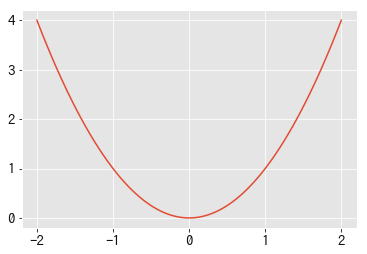

In [29]:
# シンプルな方法の例
X = np.linspace(-2, 2, 100)  # -2から2まで100個の点を等間隔で用意
Y = X ** 2

plt.figure()  # Figureを初期化
plt.plot(X, Y)  # プロット
plt.show()  # 図を表示

#### 2. フォーマルな書き方
フォーマルな書き方では、明示的にfigureやaxesを扱います。シンプルな書き方ではplt.figure()を呼びだすだけでしたが、正式にはplt.figure()で作られたfigureを変数として受け取り、それを操作することによって描画を行います。関数の呼び出し方などもやや異なることに注意が必要です。

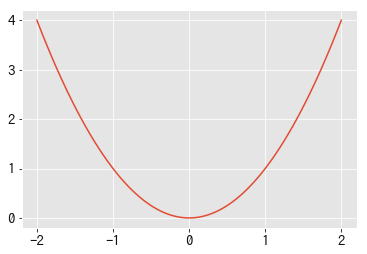

In [30]:
fig = plt.figure()  # Figureを生成
ax = fig.add_subplot(111)  # Axesを生成
ax.plot(X, Y)  # 指定のAxesに描画
plt.show()  # 図を表示

## 直線の描画 (plt.plot)
直線の描画には、plt.plotを使 用します。
plot関数には、
```
plot(X軸の値のリスト、Y軸の値のリスト、オプション…)
```
という引数を入力します。

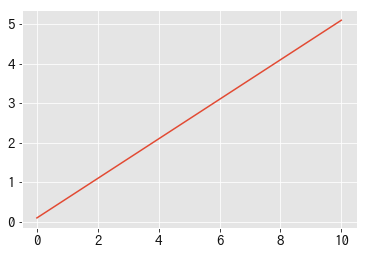

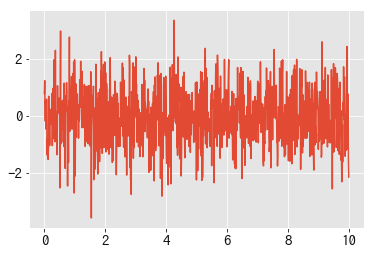

In [31]:
X = np.linspace(0, 10, 100)
Y = 0.5 * X + 0.1

# 直線の描画
plt.figure()
plt.plot(X, Y)
plt.show()

# ホワイトノイズの描画
X = np.linspace(0, 10, 1000)
Y = np.random.normal(size=1000)
plt.figure()  # 図を再度初期化
plt.plot(X, Y)
plt.show()

## 色と太さの指定
線の色の指定にはcolor引数を、太さの指定にはlinewidth引数を用います。
<img src="figures/named_colors.png">
(https://matplotlib.org/2.0.0/examples/color/named_colors.html より)

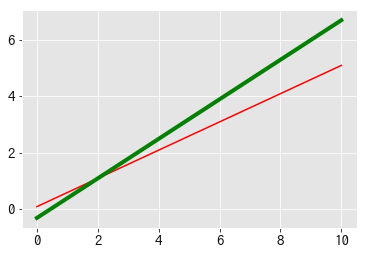

In [32]:
X = np.linspace(0, 10, 100)
Y = 0.5 * X + 0.1
Y2= 0.7 * X - 0.3

plt.figure()
plt.plot(X, Y, color="r")
plt.plot(X, Y2, color="g", linewidth=4)
plt.show()

## 散布図の描画、マーカー
散布図の描画には、plt.scatterを使います。
また、marker引数を指定することで、マーカー (点の形) を指定することができます。
<img src="figures/marker_reference_00.png" width="50%"><img src="figures/marker_reference_01.png" width="50%">

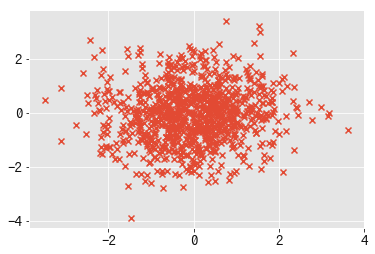

In [33]:
# サンプル：2次元正規分布
X = np.random.normal(size=1000)
Y = np.random.normal(size=1000)

plt.figure()
plt.scatter(X, Y, marker="x")
plt.show()

## ヒストグラムの描画
ヒストグラムの描画には、plt.histを用いる：
ヒストグラムの各棒の幅は、
* bins引数に必要な本数を入れる (データの最小値・最大値の影響を受ける)
* bins引数にnp.linspaceで区切り点を指定する

の2つの方法がある。

また、ヒストグラムを度数ではなく確率で表示したい場合は、normed引数をTrueに設定する。

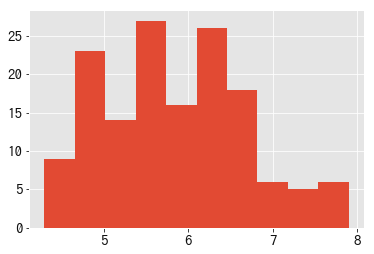

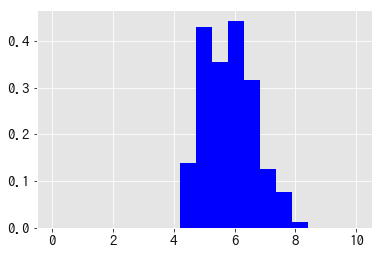

In [34]:
X = iris.data[:, 0]  #  今回は簡単のため0次元目のみを使用
Y = iris.target

plt.figure()
plt.hist(X, bins=10)  # binの本数を直接指定
plt.show()

bins = np.linspace(0, 10, 20)

plt.figure()
plt.hist(X, bins=bins, color="b", normed=True)  # np.linspaceで間接指定、確率を使用
plt.show()

## 図の整形と保存
多くの場合、素朴にプロットしただけでは綺麗な図にすることはできません。そこで、次の要素を調整することで図の見た目を整えます：
* タイトル (plt.title)
* ラベル名 (plt.xlabel, plt.ylabel)
* 凡例 (labelキーワードとplt.legend())
* X軸/Y軸の範囲 (plt.xlim、plt.ylim)
* 空白の自動調整 (plt.tight_layout)

また、図の保存にはplt.savefig("ファイル名")を用いる。

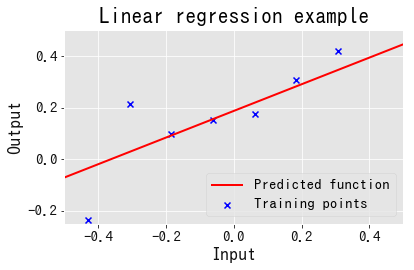

In [35]:
# 直線に対する線形回帰 (実践演習1)
nb_train = 50
rnd = np.random.RandomState(1701)

# 訓練データ
train_x = np.linspace(-3, 3, nb_train)
train_y = 0.5 * train_x + 0.2 + 0.2 * rnd.randn(len(train_x))

# ここでは正解を与える (解くのは演習)
theta = [ 0.51640697, 0.18726988]
pred_y = train_x * theta[0] + theta[1]

# グラフの描画
plt.figure()
plt.title("Linear regression example")  # タイトル
plt.plot(train_x, pred_y, color="r", label="Predicted function", linewidth=2)  # ラベルをつける
plt.scatter(train_x, train_y, marker="x", color="b", label="Training points")  # ラベルをつける
plt.xlim(-0.5, 0.5)  # xlim(最小値、最大値)
plt.ylim(-0.25, 0.5)  # ylim(最小値、最大値)
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend(loc="lower right")  # loc引数を指定することで、凡例の出現位置を制御できる
plt.tight_layout()  # グラフから文字がはみ出たりした場合に自動調整してくれる
plt.savefig("lr_sample.jpg")
plt.show()

## その他の機能
Matplotlibには、その他にも多数の描画機能がありますが、次回以降必要になった際に扱います：
* 棒グラフ (plt.bar)
* ヒートマップ (plt.imshow)
* 等高線図 (plt.contour)
* 3次元グラフ (Axes3D)
* など…

## 書いてみよう (2) 2変数線形回帰
直線
$$y = ax + b$$は、2つの点$$\{(x_1, y_1), (x_2, y_2)\}\ \ \ (x_1 \neq x_2)$$があれば点同士を結ぶことで傾きaとバイアスbを計算することができます。

このようなa, bを求めるために、今回は次のような方程式を立てます。
$$
  \left(
    \begin{array}{cc}
      x_1 & 1 \\
      x_2 & 1 \\
    \end{array}
  \right)
  \left(
    \begin{array}{c}
      a \\
      b \\
    \end{array}
  \right)
  =
  \left(
    \begin{array}{c}
      y_1 \\
      y_2 \\
    \end{array}
  \right)  
$$

**課題1：**連立方程式をnp.linalg.solveで解いて、傾きa, バイアスbを計算せよ。  
**課題2：**計算したa, bを元に直線と元のデータ点をプロットし、見やすいようにタイトル・幅・色・ラベル名などを調整せよ。

### ヒント：
* (x1, x2)の形のままではnp.linalg.solveに入れられないので、列ベクトル(1, 1)を結合しよう。
* 直線のプロットにはplt.plotとplot_X, plot_Yを、データ点のプロットにはplt.scatterを使おう。

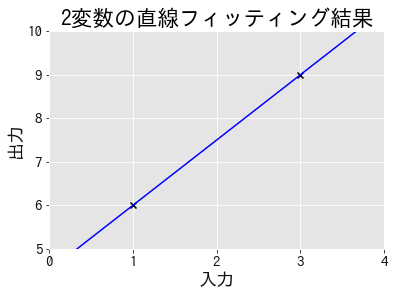

In [36]:
x = np.array([3, 1])
t = np.array([9, 6])

# WRITE ME! (方程式を解く)
X = np.stack((x, [1, 1]), axis=1)
solution = np.linalg.solve(X, t)

plot_X = np.linspace(0, 10, 40)
plot_Y = solution[0] * plot_X + solution[1]

plt.figure()

# WRITE ME! (フィッティングした直線とデータ点をプロット)
plt.plot(plot_X, plot_Y, color="b")
plt.scatter(X[:,0], t, marker="x", color="k")
plt.title("2変数の直線フィッティング結果")
plt.xlim(0, 4)
plt.ylim(5, 10)
plt.xlabel("入力")
plt.ylabel("出力")

plt.show()